In [1]:
from SOM_plus_clustering.som import SOM
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
bonds_df = pd.read_csv("Atomic-Bond/Datas/cleared_data.csv")
elems_df = pd.read_csv("Elements\Datas\clear_encoded_data.csv")
fg_df = pd.read_csv("Functional-Group\Datas\clear_encoded_data.csv")
mw_df = pd.read_csv("Elements\Datas\molecular_weights.csv")
print(bonds_df.shape)
print(elems_df.shape)
print(fg_df.shape)
print(mw_df.shape)

(62087, 49)
(62087, 10)
(62087, 27)
(62087, 1)


In [3]:
frames = [bonds_df, elems_df, fg_df, mw_df]
result = pd.concat(frames, axis=1)
#check if there is any non null data
[i for i in list(result.isnull().sum()) if i != 0]

[]

In [4]:
result

,"('N', 'O', 2)","('P', 'O', 2)","('O', 'S', 1)","('C', 'O', 1)","('C', 'O', 1.5)","('I', 'C', 1)","('C', 'N', 3)","('O', 'O', 1)","('N', 'Cl', 1)","('N', 'H', 1)",...,sulfoxide,azido,nitroso,phospate,phospite,isothio,thioamide,aromatic,cycle,weight
0,0,0,0,1,0,0,2,0,0,1,...,0,0,0,0,0,0,0,1,2,413.8614
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,322.2854
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,2,302.1954
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,299.3411
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,2,2,275.3347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62082,0,0,0,2,2,0,0,0,0,1,...,0,0,0,0,0,0,0,2,1,371.2442
62083,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,1,254.3384
62084,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,3,286.4406
62085,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,2,254.4422


In [18]:
X = result.values
pca = PCA(n_components=2)
pca.fit(X)
transformed_data = pca.transform(X)
transformed_data.shape

(62087, 2)

In [19]:
pca.explained_variance_ratio_

array([0.97461512, 0.01583643])

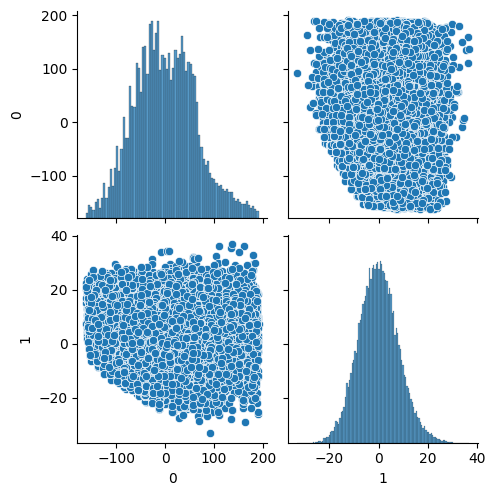

In [20]:
pca_df = pd.DataFrame(transformed_data)
sns.pairplot(pca_df)

Training   | [█████████████████████████████████████-- ] 93% 

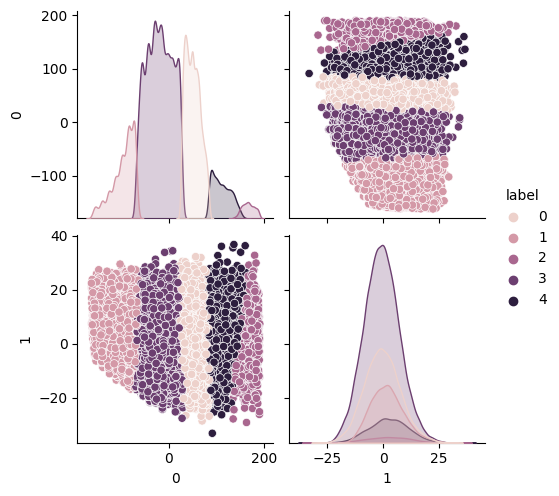

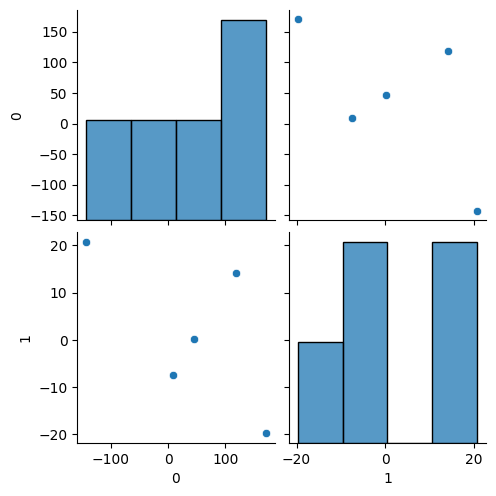

In [21]:
X = transformed_data
clustering_model = SOM(m = 1,
                    n = 5, 
                    dim=X.shape[1],
                    max_iter=None,
                    initiate_method="SOM++",
                    learning_rate=0.5,
                    neighbour_rad=1.5)
clustering_model.fit(X, epoch=15)
pred = clustering_model.predict(X)
plot_df = pd.DataFrame(pca_df)
plot_df["label"] = pred
sns.pairplot(plot_df, hue="label", corner=False)
sns.pairplot(pd.DataFrame(clustering_model.cluster_center_))

In [26]:
cluster_data = pd.DataFrame(pca.inverse_transform( clustering_model.cluster_center_), columns=result.columns)
converted_cluster = cluster_data[cluster_data > 0.2].dropna(axis=1)
converted_cluster

,"('C', 'O', 1)","('N', 'H', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('C', 'C', 1)","('C', 'C', 1.5)","('O', 'C', 2)","('C', 'H', 1)",C,H,N,O,amines,ether,aldehyde,aromatic,weight
0,1.380820,1.987504,5.845268,0.866994,9.431460,6.271400,1.004929,23.410583,18.678372,25.697356,3.171259,2.176589,2.027943,0.571746,1.004898,1.340599,356.908554
1,1.011351,1.922858,0.347821,1.029935,1.257068,3.629066,0.201991,4.041874,6.106763,6.383558,1.573794,1.382060,0.409188,0.224828,0.201915,0.961821,169.801103
2,1.558227,2.147295,10.155822,0.562658,16.684075,6.862990,1.485158,40.271691,27.902361,42.593197,4.221923,2.482637,3.356477,0.801096,1.485189,1.325376,479.788795
3,1.187013,2.189592,6.024211,0.538032,11.242870,3.644089,0.757299,27.109617,17.926519,29.537191,2.853157,1.621497,2.189270,0.504827,0.757318,0.780627,319.317060
4,1.749014,1.612316,5.618727,1.476609,6.216015,11.216794,1.481801,16.896383,20.323104,18.919808,3.794839,3.226030,1.758873,0.703138,1.481679,2.391053,430.567291


In [27]:
converted_cluster.to_csv("reduced_cluster_center_data.csv")
converted_cluster.round(3).to_excel("reduced_cluster_center_data.xlsx")

In [ ]:
cluster_data.to_csv("cluster_center_data.csv")
cluster_data.round(3).to_excel("cluster_center_data.xlsx")

In [28]:
result["label"] = pred
result

,"('N', 'O', 2)","('P', 'O', 2)","('O', 'S', 1)","('C', 'O', 1)","('C', 'O', 1.5)","('I', 'C', 1)","('C', 'N', 3)","('O', 'O', 1)","('N', 'Cl', 1)","('N', 'H', 1)",...,azido,nitroso,phospate,phospite,isothio,thioamide,aromatic,cycle,weight,label
0,0,0,0,1,0,0,2,0,0,1,...,0,0,0,0,0,0,1,2,413.8614,3
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,322.2854,3
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,2,302.1954,0
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,1,0,299.3411,3
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,2,2,275.3347,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62082,0,0,0,2,2,0,0,0,0,1,...,0,0,0,0,0,0,2,1,371.2442,3
62083,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,1,254.3384,3
62084,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,1,3,286.4406,0
62085,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,2,254.4422,0


In [29]:
result.to_csv("labeled_data.csv")